In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from sodapy import Socrata
import gmaps


# Import API key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



### Police Station vs Crime Heatmap
Find crime hotspots as it relates to police office locations

I ploted a map of police stations and then layered in a heat map of crime. In the heatmap it does look like there could be a need for an additional police station in the loop where there is more volume of crime occuring. 

In [3]:
client = Socrata("data.cityofchicago.org", 'i1WLNAiRhW1Hmlcls0gHWA6KU')
results_police_stations = client.get("9rg7-mz9y")
results_police_stations

# Convert to pandas DataFrame
results_df = pd.DataFrame(results_police_stations)

results_df.head()

,:@computed_region_43wa_7qmu,:@computed_region_6mkv_f3dw,:@computed_region_awaf_s7ux,:@computed_region_bdys_3d7i,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,address,city,district,district_name,...,latitude,location,longitude,phone,state,tty,website,x_coordinate,y_coordinate,zip
0,9,21194,12,330,40,34,1718 S State St,Chicago,1,Central,...,41.85837259,"{'type': 'Point', 'coordinates': [-87.62735617...",-87.62735617,312-745-4290,IL,312-745-3693,http://home.chicagopolice.org/community/distri...,1176569.052,1891771.704,60616
1,31,21554,17,487,59,70,7808 S Halsted St,Chicago,6,Gresham,...,41.75213684,"{'type': 'Point', 'coordinates': [-87.64422890...",-87.64422891,312-745-3617,IL,312-745-3639,http://home.chicagopolice.org/community/distri...,1172283.013,1853022.646,60620
2,14,21184,36,36,28,28,3151 W Harrison St,Chicago,11,Harrison,...,41.87358229,"{'type': 'Point', 'coordinates': [-87.70548812...",-87.70548813,312-746-8386,IL,312-746-5151,http://home.chicagopolice.org/community/distri...,1155244.069,1897148.755,60612
3,50,21869,20,780,48,11,5151 N Milwaukee Ave,Chicago,16,Jefferson Park,...,41.97409445,"{'type': 'Point', 'coordinates': [-87.76614884...",-87.76614884,312-742-4480,IL,312-742-4423,http://home.chicagopolice.org/community/distri...,1138480.758,1933660.473,60630
4,24,21853,46,242,9,10,6464 N Clark St,Chicago,24,Rogers Park,...,41.99976348,"{'type': 'Point', 'coordinates': [-87.67132429...",-87.67132429,312-744-5907,IL,312-744-7603,http://home.chicagopolice.org/community/distri...,1164193.588,1943199.401,60626


In [10]:
locations = pd.DataFrame(results_df['latitude'], columns=['latitude']).astype(float)
locations['longitude'] = results_df['longitude'].astype(float)
fig = gmaps.figure()
# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations)
# Add the layer to the map
fig.add_layer(markers)

In [11]:
# https://data.cityofchicago.org/resource/x2n5-8w5q.json
results_crime = client.get("x2n5-8w5q", limit=2000)
results_crime
# Convert to pandas DataFrame
results_crime_df = pd.DataFrame.from_records(results_crime)
results_crime_df

,:@computed_region_43wa_7qmu,:@computed_region_6mkv_f3dw,:@computed_region_awaf_s7ux,:@computed_region_bdys_3d7i,:@computed_region_vrxf_vc4k,_iucr,_location_description,_primary_decsription,_secondary_description,arrest,...,case_,date_of_occurrence,domestic,fbi_cd,latitude,location,longitude,ward,x_coordinate,y_coordinate
0,47,21202,43,509,42,0454,RESIDENCE,BATTERY,AGG PO HANDS NO/MIN INJURY,Y,...,JB321447,2018-06-25T05:10:00.000,N,08B,41.736938745,"{'latitude': '41.736938745', 'longitude': '-87...",-87.545828434,7,1199184,1847715
1,45,4299,4,599,26,031A,STREET,ROBBERY,ARMED: HANDGUN,N,...,JB321427,2018-06-25T05:10:00.000,Y,03,41.902866042,"{'latitude': '41.902866042', 'longitude': '-87...",-87.758263836,37,1140799,1907719
2,16,22616,37,634,31,0486,APARTMENT,BATTERY,DOMESTIC BATTERY SIMPLE,N,...,JB321425,2018-06-25T05:20:00.000,Y,08B,41.972364558,"{'latitude': '41.972364558', 'longitude': '-87...",-87.656304974,46,1168355,1933247
3,30,21554,6,532,70,0810,RESIDENCE,THEFT,OVER $500,N,...,JB321430,2018-06-25T05:30:00.000,Y,06,41.740225957,"{'latitude': '41.740225957', 'longitude': '-87...",-87.675329027,18,1163830,1848616
4,45,4299,4,562,26,031A,STREET,ROBBERY,ARMED: HANDGUN,N,...,JB321434,2018-06-25T05:30:00.000,N,03,41.899023579,"{'latitude': '41.899023579', 'longitude': '-87...",-87.758158731,37,1140837,1906319
5,37,21202,43,420,39,0486,GAS STATION,BATTERY,DOMESTIC BATTERY SIMPLE,N,...,JB321433,2018-06-25T05:50:00.000,N,08B,41.751719438,"{'latitude': '41.751719438', 'longitude': '-87...",-87.566914357,7,1193381,1853049
6,33,21192,32,501,8,0810,ALLEY,THEFT,OVER $500,N,...,JB321435,2018-06-25T05:50:00.000,N,06,41.796670973,"{'latitude': '41.796670973', 'longitude': '-87...",-87.583982123,5,1188581,1869388
7,46,4299,41,456,24,0620,RESIDENCE,BURGLARY,UNLAWFUL ENTRY,Y,...,JB333085,2018-06-25T06:00:00.000,N,05,41.898051518,"{'latitude': '41.898051518', 'longitude': '-87...",-87.718839311,27,1151544,1906039
8,24,21849,13,106,6,0910,PARK PROPERTY,MOTOR VEHICLE THEFT,AUTOMOBILE,N,...,JB322986,2018-06-25T06:00:00.000,N,07,41.975047636,"{'latitude': '41.975047636', 'longitude': '-87...",-87.679371511,47,1162075,1934176
9,19,22254,39,458,17,0820,SIDEWALK,THEFT,$500 AND UNDER,N,...,JB322210,2018-06-25T06:00:00.000,N,06,41.945184515,"{'latitude': '41.945184515', 'longitude': '-87...",-87.811032547,36,1126340,1923048


In [12]:
crime_locations = pd.DataFrame(results_crime_df['latitude'], columns=['latitude']).astype(float)
crime_locations['longitude'] = results_crime_df['longitude'].astype(float)
cleaned_crime_locations = crime_locations.dropna(how='all')
heatmap = gmaps.heatmap_layer(cleaned_crime_locations)

fig.add_layer(heatmap)


fig

Figure(layout=FigureLayout(height='420px'))

### Crime vs Location type
What type of location is the most crime happening

I took the top 5 location types of where crime was happening and bumped up against the type of crime.  In my bar charts below i found the following:

* Battery was clearly the majority crime that happened in an apartment location type but when you look at residence location type there is also a significant amount of deceptive practices, burglarly, theft and other offenses
* In parking location type theft was clearly the majority of crime type that occurs
* For sidewalk loaction type battery, narcotics and robbery are the most common type of crime

In [7]:
location_description = results_crime_df.groupby("_location_description").count()["case_"].sort_values(ascending=False)
top_five_loc = pd.DataFrame(location_description.head(5))
top_five_loc


,case_
_location_description,
STREET,402
RESIDENCE,330
APARTMENT,257
SIDEWALK,146
OTHER,92


In [8]:
condition = (results_crime_df['_location_description'] == 'STREET') | (results_crime_df['_location_description'] == 'RESIDENCE') |(results_crime_df['_location_description'] == 'APARTMENT') | (results_crime_df['_location_description'] == 'SIDEWALK')| (results_crime_df['_location_description'] == 'PARKING LOT/GARAGE(NON.RESID.)')
filtered_df = pd.DataFrame(results_crime_df[condition])
filtered_df

,:@computed_region_43wa_7qmu,:@computed_region_6mkv_f3dw,:@computed_region_awaf_s7ux,:@computed_region_bdys_3d7i,:@computed_region_vrxf_vc4k,_iucr,_location_description,_primary_decsription,_secondary_description,arrest,...,case_,date_of_occurrence,domestic,fbi_cd,latitude,location,longitude,ward,x_coordinate,y_coordinate
0,47,21202,43,509,42,0454,RESIDENCE,BATTERY,AGG PO HANDS NO/MIN INJURY,Y,...,JB321447,2018-06-25T05:10:00.000,N,08B,41.736938745,"{'latitude': '41.736938745', 'longitude': '-87...",-87.545828434,7,1199184,1847715
1,45,4299,4,599,26,031A,STREET,ROBBERY,ARMED: HANDGUN,N,...,JB321427,2018-06-25T05:10:00.000,Y,03,41.902866042,"{'latitude': '41.902866042', 'longitude': '-87...",-87.758263836,37,1140799,1907719
2,16,22616,37,634,31,0486,APARTMENT,BATTERY,DOMESTIC BATTERY SIMPLE,N,...,JB321425,2018-06-25T05:20:00.000,Y,08B,41.972364558,"{'latitude': '41.972364558', 'longitude': '-87...",-87.656304974,46,1168355,1933247
3,30,21554,6,532,70,0810,RESIDENCE,THEFT,OVER $500,N,...,JB321430,2018-06-25T05:30:00.000,Y,06,41.740225957,"{'latitude': '41.740225957', 'longitude': '-87...",-87.675329027,18,1163830,1848616
4,45,4299,4,562,26,031A,STREET,ROBBERY,ARMED: HANDGUN,N,...,JB321434,2018-06-25T05:30:00.000,N,03,41.899023579,"{'latitude': '41.899023579', 'longitude': '-87...",-87.758158731,37,1140837,1906319
7,46,4299,41,456,24,0620,RESIDENCE,BURGLARY,UNLAWFUL ENTRY,Y,...,JB333085,2018-06-25T06:00:00.000,N,05,41.898051518,"{'latitude': '41.898051518', 'longitude': '-87...",-87.718839311,27,1151544,1906039
9,19,22254,39,458,17,0820,SIDEWALK,THEFT,$500 AND UNDER,N,...,JB322210,2018-06-25T06:00:00.000,N,06,41.945184515,"{'latitude': '41.945184515', 'longitude': '-87...",-87.811032547,36,1126340,1923048
10,49,22535,10,422,24,0810,STREET,THEFT,OVER $500,N,...,JB323192,2018-06-25T06:00:00.000,N,06,41.910007135,"{'latitude': '41.910007135', 'longitude': '-87...",-87.715579879,26,1152400,1910402
12,4,22260,31,348,9,2826,RESIDENCE,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,N,...,JB322722,2018-06-25T06:08:00.000,Y,26,41.769451222,"{'latitude': '41.769451222', 'longitude': '-87...",-87.608925614,6,1181863,1859411
14,50,21869,20,746,12,1320,STREET,CRIMINAL DAMAGE,TO VEHICLE,N,...,JB322643,2018-06-25T06:30:00.000,N,14,41.973672716,"{'latitude': '41.973672716', 'longitude': '-87...",-87.752857648,45,1142096,1933531


In [9]:
cleaned_df = filtered_df[['case_' ,'_location_description', '_primary_decsription']]
cleaned_df = pd.DataFrame(cleaned_df)
pivot = cleaned_df.pivot_table(values='case_', index='_location_description', columns='_primary_decsription',aggfunc='count')
pivot.fillna(value=0,method=None)
top_five_df = pd.DataFrame(pivot.fillna(value=0,method=None))
top_five_df

_primary_decsription,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,INTERFERENCE WITH PUBLIC OFFICER,...,MOTOR VEHICLE THEFT,NARCOTICS,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
_location_description,,,,,,,,,,,,,,,,,,,,,
APARTMENT,24.0,94.0,31.0,5.0,27.0,4.0,12.0,0.0,0.0,0.0,...,1.0,6.0,3.0,14.0,0.0,2.0,2.0,0.0,30.0,1.0
PARKING LOT/GARAGE(NON.RESID.),6.0,8.0,0.0,0.0,17.0,1.0,0.0,0.0,0.0,0.0,...,4.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,33.0,0.0
RESIDENCE,19.0,62.0,39.0,2.0,36.0,9.0,55.0,0.0,0.0,0.0,...,1.0,4.0,4.0,45.0,2.0,1.0,1.0,1.0,45.0,3.0
SIDEWALK,15.0,38.0,0.0,1.0,2.0,0.0,3.0,3.0,0.0,3.0,...,0.0,25.0,0.0,4.0,1.0,26.0,2.0,0.0,15.0,8.0
STREET,28.0,44.0,0.0,0.0,75.0,7.0,5.0,0.0,3.0,1.0,...,49.0,21.0,1.0,26.0,4.0,18.0,0.0,0.0,106.0,13.0


Text(0, 0.5, 'Arrests')

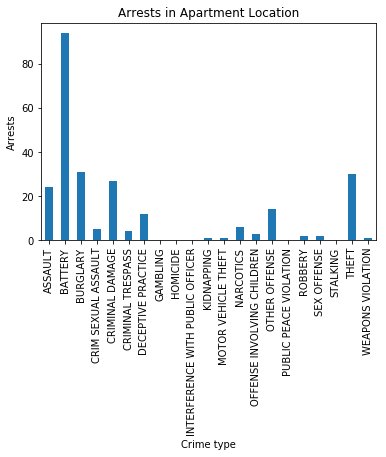

In [11]:
Apartment = top_five_df.iloc[0].plot.bar() 
plt.title("Arrests in Apartment Location")
plt.xlabel("Crime type")
plt.ylabel("Arrests")




Text(0, 0.5, 'Arrests')

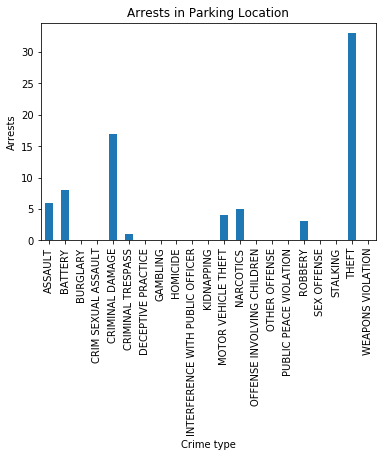

In [12]:
parking = top_five_df.iloc[1].plot.bar()
plt.title("Arrests in Parking Location")
plt.xlabel("Crime type")
plt.ylabel("Arrests")

Text(0, 0.5, 'Arrests')

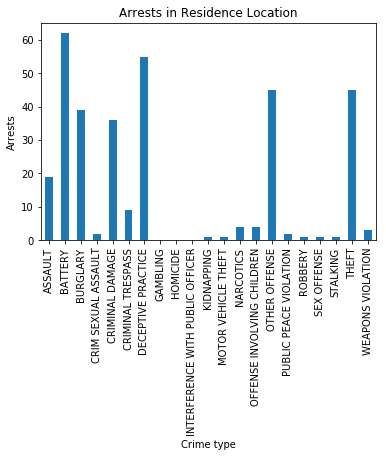

In [13]:
residence = top_five_df.iloc[2].plot.bar()

plt.title("Arrests in Residence Location")
plt.xlabel("Crime type")
plt.ylabel("Arrests")

Text(0, 0.5, 'Arrests')

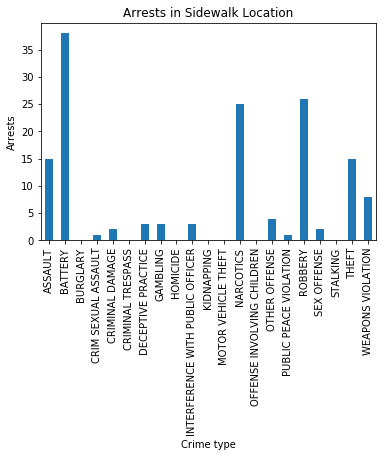

In [14]:
sidewalk = top_five_df.iloc[3].plot.bar()
plt.title("Arrests in Sidewalk Location")
plt.xlabel("Crime type")
plt.ylabel("Arrests")

Text(0, 0.5, 'Arrests')

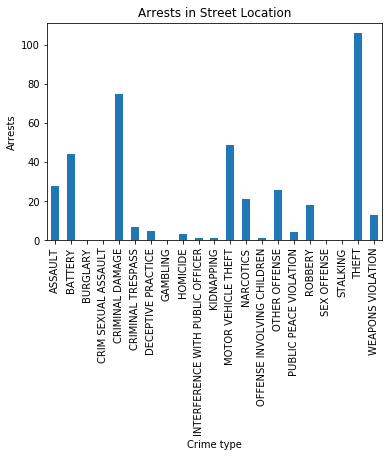

In [15]:
street = top_five_df.iloc[4].plot.bar()
plt.title("Arrests in Street Location")
plt.xlabel("Crime type")
plt.ylabel("Arrests")